In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/shakthimaha/Downloads/zcored_data.csv")

In [3]:
numerical_columns = df.select_dtypes(include=['float64']).columns
data_numeric = df[numerical_columns]

In [4]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [5]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(data_scaled)

In [6]:
# Creating DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(5)])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display results
print(pca_df.head())
print("Explained Variance Ratio:", explained_variance)

        PC1       PC2       PC3       PC4       PC5
0 -1.657302  5.343796  0.957247  0.621684 -1.846391
1 -2.192670  5.350817  2.015536  1.950458 -1.838289
2 -3.757722  2.658980 -0.371397 -1.255745 -1.219249
3 -3.920763  2.661098  1.670338  1.745145 -1.571840
4  0.969258 -0.378211 -0.687361  0.873856 -0.612083
Explained Variance Ratio: [0.36519487 0.19496202 0.12864978 0.07639917 0.06841225]


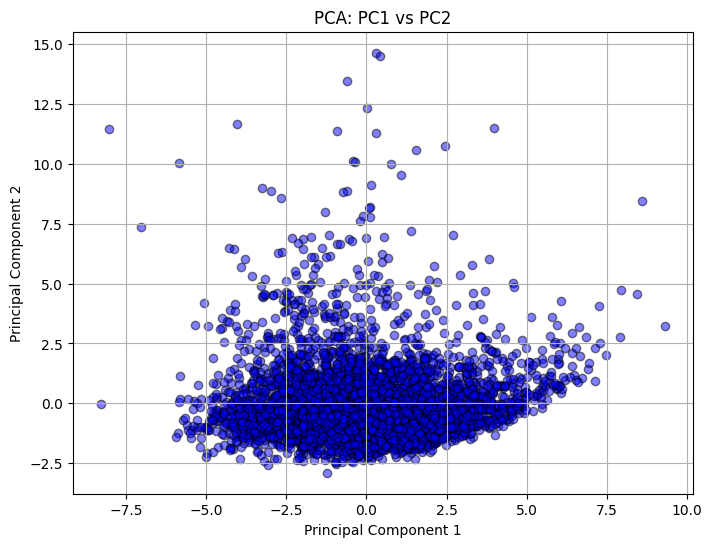

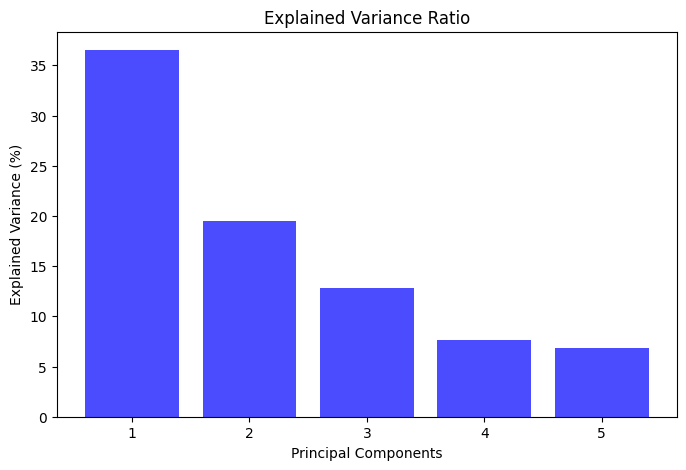

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, c='blue', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs PC2')
plt.grid(True)
plt.show()

# Scree plot (explained variance per component)
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), explained_variance * 100, alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance Ratio')
plt.xticks(range(1, 6))
plt.show()

/Users/shakthimaha/development/Urban/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


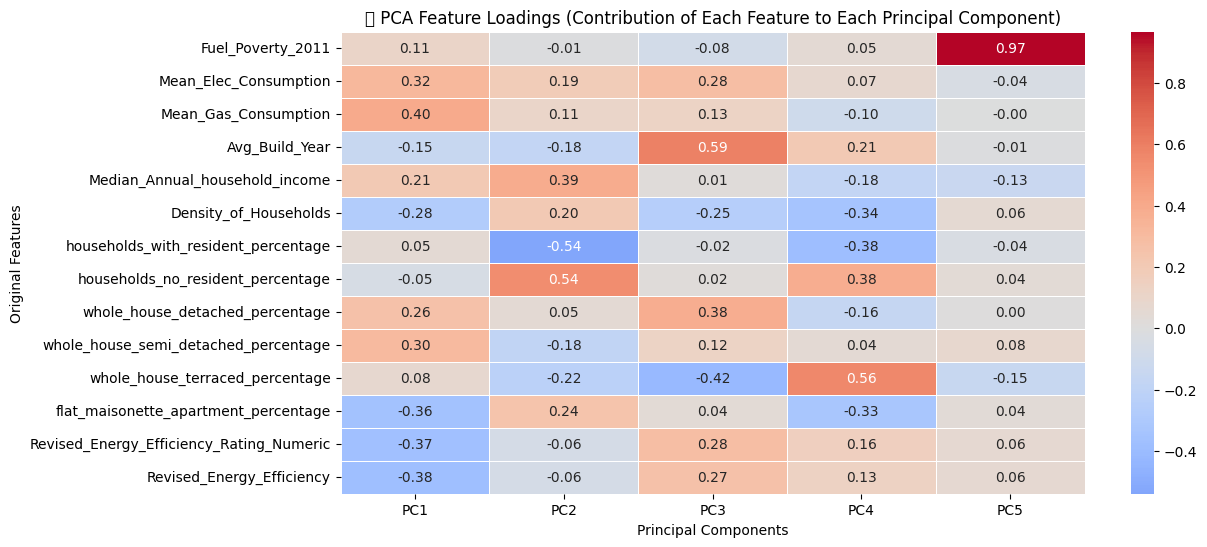

/Users/shakthimaha/development/Urban/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


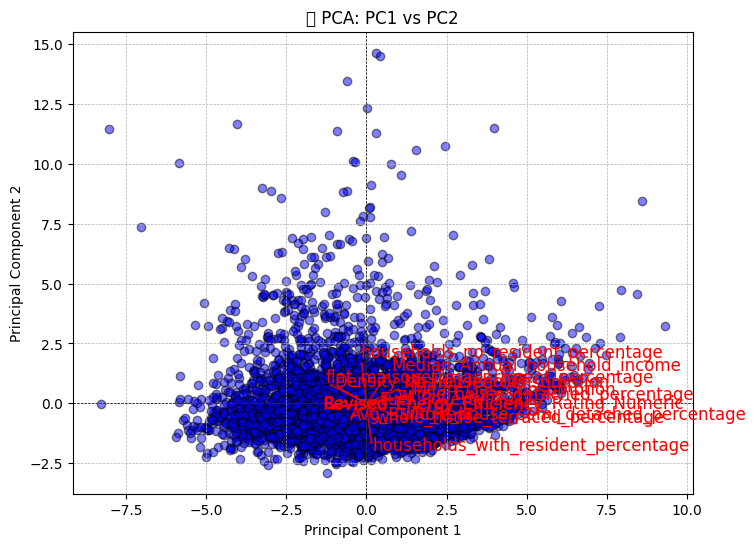

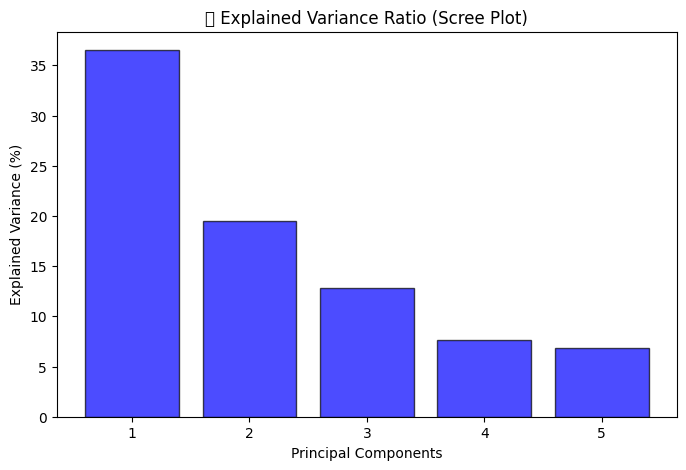

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/Users/shakthimaha/Downloads/zcored_data.csv")

# Selecting numerical columns for PCA
numerical_columns = df.select_dtypes(include=['number']).columns
data_numeric = df[numerical_columns]

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Applying PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(data_scaled)

# Creating a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(5)])

# Get PCA Loadings (feature contributions)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(5)], index=numerical_columns)

# 🔥 Heatmap of Feature Loadings
plt.figure(figsize=(12, 6))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("🔍 PCA Feature Loadings (Contribution of Each Feature to Each Principal Component)")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.xticks(rotation=0)
plt.show()

# 🎯 Biplot: PC1 vs PC2 with Feature Vectors
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, c='blue', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('📊 PCA: PC1 vs PC2')

# Dynamically scale feature vectors for better visibility
scaling_factor = 3
for i, feature in enumerate(numerical_columns):
    plt.arrow(0, 0, pca.components_[0, i] * scaling_factor, pca.components_[1, i] * scaling_factor,
              color='red', alpha=0.7, head_width=0.05)
    plt.text(pca.components_[0, i] * scaling_factor * 1.2, 
             pca.components_[1, i] * scaling_factor * 1.2, 
             feature, color='red', fontsize=12)

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Scree Plot: Explained Variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_ * 100, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('📊 Explained Variance Ratio (Scree Plot)')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

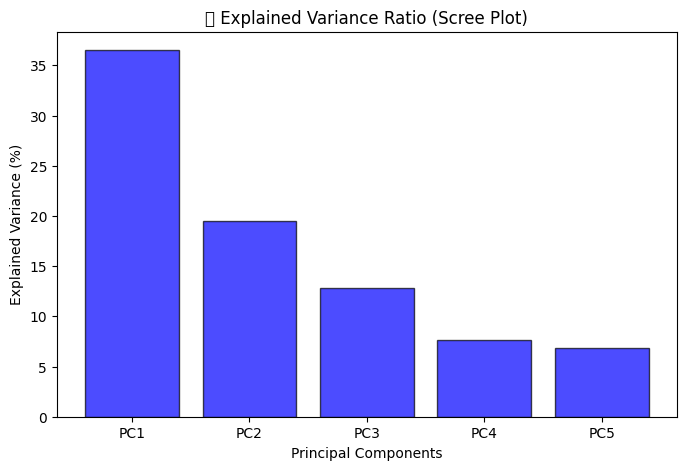

In [12]:
# 📈 Improved Scree Plot: Explained Variance
plt.figure(figsize=(8, 5))
pc_labels = [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]  # Create PC labels

plt.bar(pc_labels, pca.explained_variance_ratio_ * 100, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('📊 Explained Variance Ratio (Scree Plot)')
plt.xticks(rotation=0)  # Keep PC labels horizontal for better readability
plt.show()